Enter the number of nodes : 100
Enter the length : 250
Enter the breadth : 250


(100, 2)

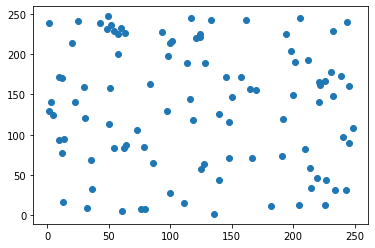

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from math import sqrt
#Creating a node with x and y coordinates and default energy as 1
class node:
    def __init__(self,x,y,energy=1):
            self.x= x
            self.y= y
            self.energy= energy
    def __str__(self):
        return str(self.energy)
no_nodes = int(input("Enter the number of nodes : "))
length = int(input("Enter the length : "))
breadth = int(input("Enter the breadth : "))
a =[]
i=0
#Placing the node in the given rectangular space (according to input of length and bredth)
for i in range(no_nodes):
    n = node(length*random.random(),breadth*random.random())
    a.append(n)
x_loc=[]
y_loc=[]
for i in a:
    x_loc.append(i.x)
    y_loc.append(i.y)
#Plotting the nodes in a graph to visualize them
plt.plot(x_loc,y_loc,'o')
df=pd.DataFrame()
df["X"] = x_loc
df["Y"] = y_loc
df.shape

In [9]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    #training them model
    kmeans.fit(df)
    #inertia is measured by squaring the distance between nodes and centoid of cluster  and adding the squares across one cluster
    wcss.append(kmeans.inertia_)
wcss

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with M

[1166445.7449877814,
 691174.324094993,
 413251.5323601229,
 271190.48808249785,
 209182.78523317265,
 167630.4801268635,
 137395.6225481786,
 117042.95978928047,
 97096.03872679967,
 82216.94920728821]

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with M

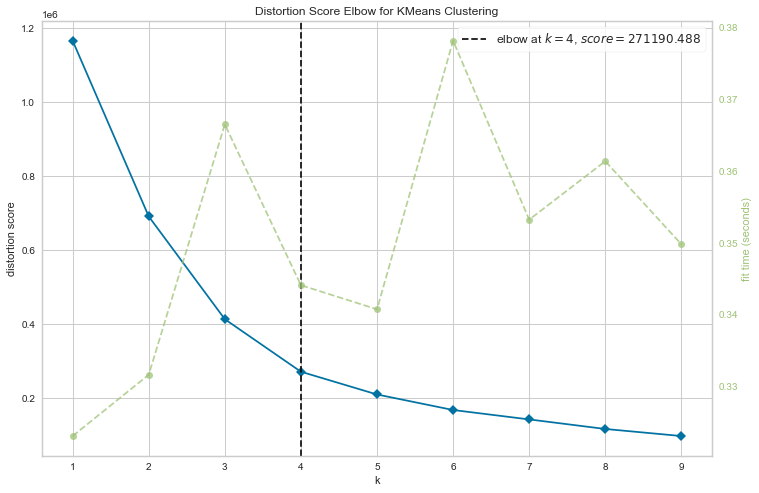

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



[3 0 0 1 3 2 3 1 0 1 1 3 0 1 1 3 0 1 1 1 0 0 0 2 0 3 0 3 0 1 1 2 3 3 3 1 0
 1 2 2 1 3 1 0 0 3 1 3 3 2 0 2 3 2 0 1 1 1 1 3 0 3 3 1 0 1 0 0 3 2 2 0 3 1
 0 2 2 0 1 3 3 2 2 2 3 3 2 1 2 2 3 3 0 3 3 3 1 1 0 1]

Printing centroids of clusters
[[198.10173649 174.95232859]
 [ 56.3361428   75.1480793 ]
 [205.02582555  51.26443279]
 [ 71.93607532 210.811276  ]]
Above are the centroids of clusters

Printing positions of 4 centroids
[198.10173649174374, 56.33614279644624, 205.02582554934145, 71.93607532092746]
[174.9523285882052, 75.14807929777425, 51.264432792503484, 210.8112759964197]


Printing distance
[56.61628078645721, 53.18081134520218, 29.392667335357075, 81.56344157862287, 52.061811428790335, 15.326667301984548, 54.288440043619836, 67.86937869401217, 63.37666909975866, 69.92218643162882, 75.59559404004722, 40.7048625332141, 25.594675583648197, 8.049660993273626, 31.420973600310223, 80.39374465015764, 28.4822935215731, 69.58231388064594, 46.78108760839597, 73.38437461260736, 41.5684784999

In [14]:
from sklearn.cluster import *
from yellowbrick.cluster import *
fig = plt.figure(figsize=(12,8))
# KNears Neighbors
# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df) # training the model
visualizer.poof()
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(df)
# Getting the cluster labels
labels = kmeans.predict(df)
print()
print(labels)
print()
# Centroid values
centroids = kmeans.cluster_centers_
print('Printing centroids of clusters')
print(centroids)
print('Above are the centroids of clusters')
#kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
xcn = [centroids[i][0] for i in range(len(centroids))]
ycn = [centroids[i][1] for i in range(len(centroids))]
print()
print('Printing positions of 4 centroids')
print(xcn)
print(ycn)
print()
x1 = xcn[0]
x2 = xcn[1]
x3 = xcn[2]
x4 = xcn[3]
y1 = ycn[0]
y2 = ycn[1]
y3 = ycn[2]
y4 = ycn[3]
lab = labels.tolist()
dist = list()
for i in range(100):
    if lab[i] == 0:
        dist.append(sqrt((x_loc[i]-x1)**2+(y_loc[i]-y1)**2))
    if lab[i] == 1:
        dist.append(sqrt((x_loc[i]-x2)**2+(y_loc[i]-y2)**2))
    if lab[i] == 2:
        dist.append(sqrt((x_loc[i]-x3)**2+(y_loc[i]-y3)**2))
    if lab[i] == 3:
        dist.append(sqrt((x_loc[i]-x4)**2+(y_loc[i]-y4)**2))
print()
print('Printing distance')
print(dist)
#Initially packet length or size is taken as 4000 
l = 4000
#Initially Free space energy loss is taken as 15*10^-12
Efs = 15*(10**-12)
#Initially multi route energy loss is taken as 0.0013*10^-12
Emp = 0.0013*(10**-12)
#Initially energy degeneration of nodes is taken as 60*10^-9
Elec = 60*(10**-9)
Etx = list()
d0 = sqrt(Efs/Emp)
for i in range(100):
    if d0 > dist[i]:
        Etx.append((Elec*l)+(Efs*l*dist[i]*dist[i]))
    else:
        Etx.append((Elec*l)+(Emp*l*dist[i]*dist[i]*dist[i]*dist[i]))
final_energy = list()
#final energy of all nodes are initially taken as 1
for i in range(100):
    final_energy.append(1)
cnt =0
#Calculating final energy of nodes
for i in range(4000):
    for j in range(100):
        final_energy[j]-=Etx[j]
deadnode = 0
#If final energy of nodes is less than 0 then they are dead nodes
for i in final_energy:
    if i<0:
        deadnode = deadnode+1
print()
print('Printing number of Dead Nodes')
print(deadnode)
print()
print('Printing Final energy of nodes')
print(final_energy)
print('Printed final energy of nodes')

In [16]:
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
fig = go.Figure(data=go.Scatter(x=df['X'], y=df['Y'],mode='markers',marker=dict(color=labels)))
fig.show()
#From the above code we can see the exact location of nodes by placing the curser on the node

Text(0.5, 1.0, 'K-Means')

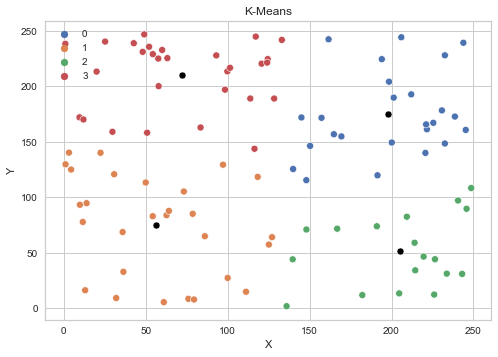

In [18]:
import seaborn as sns
sns.scatterplot(x = df["X"] , y = df["Y"] , hue = labels,palette='deep',sizes = (500,500),legend = 'full')
sns.scatterplot(x = xcn ,y = ycn , color = 'black')
plt.title("K-Means")
#Black points are centroids of the cluster

In [33]:
from sklearn.cluster import MeanShift
#training the model
clustering_ms = MeanShift(bandwidth=75).fit(df)
#Creating new labes for nodes
labels1 = clustering_ms.labels_
print('Printing labels for nodes')
print(labels1)
centroids = clustering_ms.cluster_centers_
print(centroids)
xcn_ms = [centroids[i][0] for i in range(len(centroids))]
ycn_ms = [centroids[i][1] for i in range(len(centroids))]
print(xcn_ms)
print(ycn_ms)
lab1 = labels1.tolist()
dist1 = list()
Etx1 = list()
x1 = xcn_ms[0]
x2 = xcn_ms[1]
x3 = xcn_ms[2]
x4 = xcn_ms[3]
y1 = ycn_ms[0]
y2 = ycn_ms[1]
y3 = ycn_ms[2]
y4 = ycn_ms[3]
for i in range(100):
    if lab1[i] == 0:
        dist1.append(sqrt((x_loc[i]-x1)**2+(y_loc[i]-y1)**2))
    if lab1[i] == 1:
        dist1.append(sqrt((x_loc[i]-x2)**2+(y_loc[i]-y2)**2))
    if lab1[i] == 2:
        dist1.append(sqrt((x_loc[i]-x3)**2+(y_loc[i]-y3)**2))
    if lab1[i] == 3:
        dist1.append(sqrt((x_loc[i]-x4)**2+(y_loc[i]-y4)**2))
for i in range(86):
    if d0 > dist1[i]:
        Etx1.append((Elec*l)+(Efs*l*dist1[i]*dist1[i]))
    else:
        Etx1.append((Elec*l)+(Emp*l*dist1[i]*dist1[i]*dist1[i]*dist1[i]))
final_energy1 = list()
for i in range(100):
    final_energy1.append(1)
cnt =0
for i in range(4000):
    for j in range(86):
        final_energy1[j]-=Etx1[j]
        if(final_energy1[j]<=0):
            cnt+=1
count = 0
for i in final_energy1:
    if i < 0:
        count = count +1
print(count)

Printing labels for nodes
[2 0 0 4 1 3 1 2 0 4 2 1 0 2 4 0 0 4 2 2 0 0 3 3 0 1 0 1 0 2 2 3 1 1 2 4 0
 4 3 3 2 1 2 0 0 1 2 2 1 3 0 3 1 3 0 4 4 4 4 0 0 1 1 4 0 2 0 0 1 4 3 0 1 4
 0 4 3 0 2 2 1 3 3 3 0 1 3 2 3 3 1 1 0 1 1 1 2 2 0 2]
[[161.06890185 178.55518755]
 [ 70.3499954  213.20463547]
 [ 46.58882006 117.83007029]
 [197.43519956  60.84187802]
 [ 83.80568485  51.75444612]]
[161.06890184776492, 70.34999539841945, 46.58882006347995, 197.43519955888473, 83.80568484801934]
[178.55518755026202, 213.20463547320637, 117.83007028556523, 60.84187801602132, 51.75444612245769]
84


Text(0.5, 1.0, 'Mean-Shift')

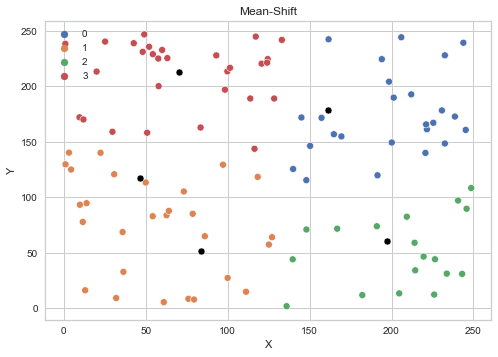

In [34]:
import seaborn as sns
sns.scatterplot(x = df["X"] , y = df["Y"] , hue = labels,palette='deep',sizes = (500,500),legend = 'full')
sns.scatterplot(x = xcn_ms ,y = ycn_ms , color = 'black')
plt.title("Mean-Shift")

In [36]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(df)
labels2 = kmedoids.labels_
centroids = kmedoids.cluster_centers_
print(centroids)
xcn_km = [centroids[i][0] for i in range(len(centroids))]
ycn_km = [centroids[i][1] for i in range(len(centroids))]
print(xcn_km)
print(ycn_km)
#print(labels2)
lab2 = labels2.tolist()
dist2 = list()
Etx2 = list()
x1 = xcn_km[0]
x2 = xcn_km[1]
x3 = xcn_km[2]
x4 = xcn_km[3]
y1 = ycn_km[0]
y2 = ycn_km[1]
y3 = ycn_km[2]
y4 = ycn_km[3]
Etx2 = list()
for i in range(100):
    if lab2[i] == 0:
        dist2.append(sqrt((x_loc[i]-x1)**2+(y_loc[i]-y1)**2))
    if lab2[i] == 1:
        dist2.append(sqrt((x_loc[i]-x2)**2+(y_loc[i]-y2)**2))
    if lab2[i] == 2:
        dist2.append(sqrt((x_loc[i]-x3)**2+(y_loc[i]-y3)**2))
    if lab2[i] == 3:
        dist2.append(sqrt((x_loc[i]-x4)**2+(y_loc[i]-y4)**2))
for i in range(100):
    if d0 > dist2[i]:
        Etx2.append((Elec*l)+(Efs*l*dist2[i]*dist2[i]))
    else:
        Etx2.append((Elec*l)+(Emp*l*dist2[i]*dist2[i]*dist2[i]*dist2[i]))
final_energy2 = list()
for i in range(100):
    final_energy2.append(1)

cnt =0
for i in range(4100):
    for j in range(100):
        final_energy2[j]-=Etx2[j]
        if(final_energy2[j]<=0):
            cnt+=1
count = 0
for i in final_energy2:
    if i < 0:
        count = count +1
print('Number of dead node are : ')
print(count)


[[219.59430961  46.50355022]
 [ 63.14650404 225.62818166]
 [ 62.64124483  83.81631686]
 [221.12659541 165.79454018]]
[219.594309605305, 63.14650403580338, 62.641244834819865, 221.12659540603218]
[46.50355021709185, 225.6281816592605, 83.81631685528107, 165.79454018440725]
Number of dead node are : 
90


Text(0.5, 1.0, 'K-Medoids')

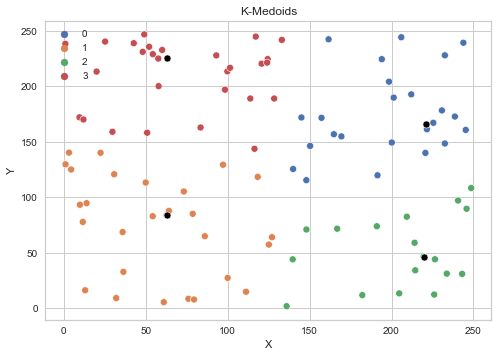

In [37]:
import seaborn as sns
sns.scatterplot(x = df["X"] , y = df["Y"] , hue = labels,palette='deep',sizes = (500,500),legend = 'full')
sns.scatterplot(x = xcn_km ,y = ycn_km , color = 'black')
plt.title("K-Medoids")

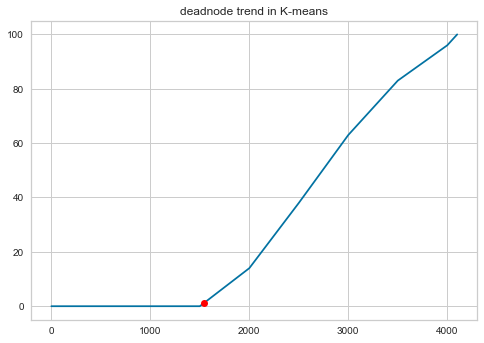

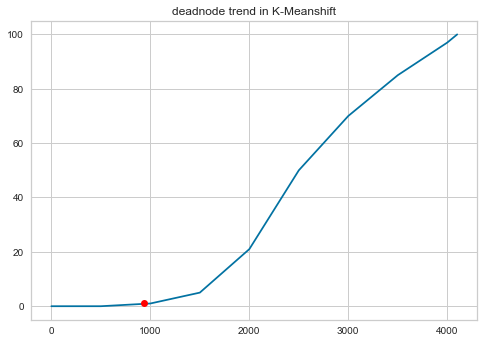

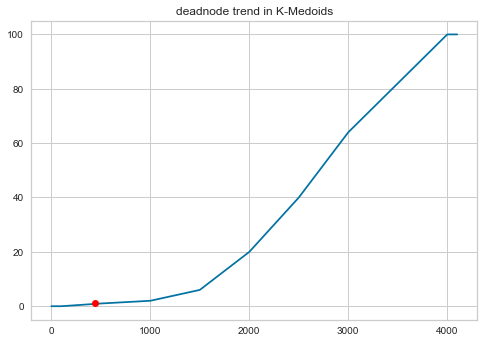

Text(0.5, 1.0, 'LIVE NODES trend ')

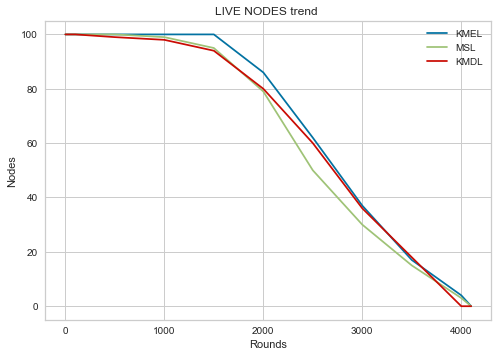

In [43]:
rounds = [0,100,500,1000,1500,2000,2500,3000,3500,4000,4100]
KME = [0,0,0,0,0,14,38,63,83,96,100]
MS = [0,0,0,1,5,21,50,70,85,97,100]
KMD = [0,0,1,2,6,20,40,64,82,100,100]
plt.plot(rounds,KME)
plt.plot(1540,1,'o',color = 'red')
plt.title("deadnode trend in K-means")
plt.show()
plt.plot(rounds,MS)
plt.plot(932,1,'o',color = 'red')
plt.title("deadnode trend in K-Meanshift")
plt.show()
plt.plot(rounds,KMD)
plt.plot(436,1,'o',color = 'red')
plt.title("deadnode trend in K-Medoids")
plt.show()
KMEL = [100,100,100,100,100,86,62,37,17,4,0]
MSL = [100,100,100,99,95,79,50,30,15,3,0]
KMDL = [100,100,99,98,94,80,60,36,18,0,0]
plt.plot(rounds,KMEL)
plt.plot(rounds,MSL)
plt.plot(rounds,KMDL)
plt.legend(labels = ['KMEL','MSL','KMDL','FCML'])
plt.xlabel("Rounds")
plt.ylabel("Nodes")
plt.title("LIVE NODES trend ")

In [ ]:
#K-Medoids algorithm works better as it has less number of dead nodes